In [35]:
import sys
assert sys.version_info >= (3, 5)
print()

# Common imports
import numpy as np
import os
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, auc,roc_auc_score, cohen_kappa_score,roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import label_binarize

from itertools import cycle

import matplotlib.pyplot as plt

In [2]:
trainData=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/x_train_all.csv')
trainLabel=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/y_train_all.csv')
testData=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/x_test_all.csv')
testLabel=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/y_test_all.csv')

In [19]:
# Extract features (pixels) and labels
X = trainData.iloc[:, 0:].values  # Assuming pixel data starts from column 1
y = trainLabel.iloc[:, 0].values   # Assuming labels are in the first column

# Normalize pixel values to be between 0 and 1
X = X / 255.0

XTest = testData.iloc[:, 0:].values  # Assuming pixel data starts from column 1
yTest = testLabel.iloc[:, 0].values   # Assuming labels are in the first column

# Normalize pixel values to be between 0 and 1
XTest = XTest / 255.0

In [7]:
X.shape

(9690, 2304)

In [25]:
# Reshape data to 2D images (assuming images are square)
img_size = int(np.sqrt(X.shape[1]))
X = X.reshape(-1, img_size, img_size, 1)  # 1 for grayscale images, 3 for RGB

# Reshape data to 2D images (assuming images are square)
img_size = int(np.sqrt(XTest.shape[1]))
XTest = XTest.reshape(-1, img_size, img_size, 1)  # 1 for grayscale images, 3 for RGB

In [9]:
img_size

48

In [10]:
y.shape

(9690,)

In [20]:
# If labels are strings, encode them to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
yTest = label_encoder.fit_transform(yTest)

In [45]:
#Build the CNN Model:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # num_classes is the number of classes in your dataset

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [46]:
#Train the Model:
model.fit(X, y, epochs=10, validation_data=(XTest, yTest))


Epoch 1/10
303/303 [==============================] - 3s 10ms/step - loss: 1.0696 - accuracy: 0.6321 - val_loss: 0.5803 - val_accuracy: 0.8424
Epoch 2/10
303/303 [==============================] - 3s 9ms/step - loss: 0.2079 - accuracy: 0.9424 - val_loss: 0.3462 - val_accuracy: 0.9207
Epoch 3/10
303/303 [==============================] - 3s 9ms/step - loss: 0.0955 - accuracy: 0.9749 - val_loss: 0.3565 - val_accuracy: 0.9097
Epoch 4/10
303/303 [==============================] - 3s 10ms/step - loss: 0.0606 - accuracy: 0.9847 - val_loss: 0.2896 - val_accuracy: 0.9453
Epoch 5/10
303/303 [==============================] - 3s 10ms/step - loss: 0.0563 - accuracy: 0.9850 - val_loss: 0.2979 - val_accuracy: 0.9382
Epoch 6/10
303/303 [==============================] - 3s 9ms/step - loss: 0.0311 - accuracy: 0.9928 - val_loss: 0.3700 - val_accuracy: 0.9330
Epoch 7/10
303/303 [==============================] - 3s 9ms/step - loss: 0.0238 - accuracy: 0.9939 - val_loss: 0.3631 - val_accuracy: 0.9356
Epo

In [49]:
# Assuming your model is named 'model' and has already been trained

# Predictions on the test set
y_pred = model.predict(XTest)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# True labels for the test set
y_true = yTest

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')  # 'weighted' for multiclass classification
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred_classes)
roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovr')  # 'ovr' for multiclass classification
kappa = cohen_kappa_score(y_true, y_pred_classes)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC-AUC Score: {roc_auc}')
print(f'Cohen\'s Kappa: {kappa}')


97/97 [==============================] - 0s 3ms/step
Accuracy: 0.9498381877022654
Precision: 0.9523192826036272
Recall: 0.9498381877022654
F1 Score: 0.948566705604468
Confusion Matrix:
[[ 44  13   1   2   0   0   0   0   0   0]
 [  0 693  20   1   4   0   1   0   1   0]
 [  0  15 725   5   5   0   0   0   0   0]
 [  0   0   3 442   1   0   0   0   3   1]
 [  1   6  16   2 634   0   1   0   0   0]
 [  0   0   0   0   0  60   0   0   0   0]
 [  0   0   0   0   0   0  90   0   0   0]
 [  0  28   0   0   0   0   0  32   0   0]
 [  0   0   1   1   0   0   0   0 125  23]
 [  0   0   0   0   0   0   0   0   0  90]]
ROC-AUC Score: 0.9963771074482922
Cohen's Kappa: 0.9382398452611218


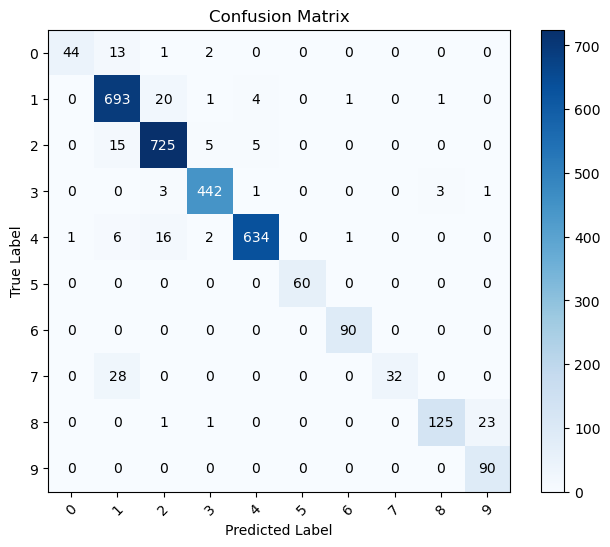

In [48]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y_true)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")

plt.show()

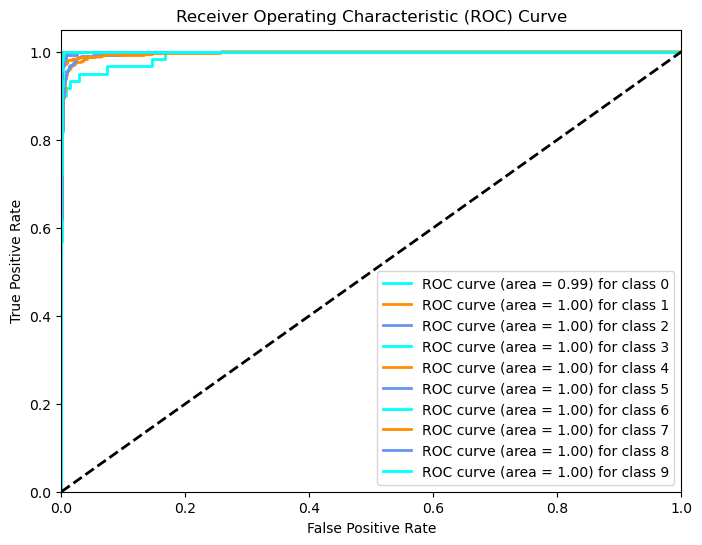

In [36]:
# Plot ROC curve
n_classes = len(np.unique(y_true))
y_true_bin = label_binarize(y_true, classes=range(n_classes))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional layers
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Flatten layer to transition from convolutional layers to fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [57]:
#Train the Model:
model.fit(X, y, epochs=10, validation_data=(XTest, yTest))

Epoch 1/10
303/303 [==============================] - 10s 33ms/step - loss: 1.6055 - accuracy: 0.3762 - val_loss: 1.0410 - val_accuracy: 0.6282
Epoch 2/10
303/303 [==============================] - 10s 33ms/step - loss: 0.6267 - accuracy: 0.7713 - val_loss: 0.3077 - val_accuracy: 0.8871
Epoch 3/10
303/303 [==============================] - 10s 33ms/step - loss: 0.3168 - accuracy: 0.8874 - val_loss: 0.2201 - val_accuracy: 0.9269
Epoch 4/10
303/303 [==============================] - 10s 33ms/step - loss: 0.2301 - accuracy: 0.9187 - val_loss: 0.1661 - val_accuracy: 0.9557
Epoch 5/10
303/303 [==============================] - 10s 33ms/step - loss: 0.1798 - accuracy: 0.9353 - val_loss: 0.1598 - val_accuracy: 0.9502
Epoch 6/10
303/303 [==============================] - 10s 33ms/step - loss: 0.1443 - accuracy: 0.9496 - val_loss: 0.1072 - val_accuracy: 0.9657
Epoch 7/10
303/303 [==============================] - 10s 34ms/step - loss: 0.1252 - accuracy: 0.9559 - val_loss: 0.1401 - val_accuracy:

In [59]:
# Assuming your model is named 'model' and has already been trained

# Predictions on the test set
y_pred = model.predict(XTest)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# True labels for the test set
y_true = yTest

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')  # 'weighted' for multiclass classification
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred_classes)
roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovr')  # 'ovr' for multiclass classification
kappa = cohen_kappa_score(y_true, y_pred_classes)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC-AUC Score: {roc_auc}')
print(f'Cohen\'s Kappa: {kappa}')


97/97 [==============================] - 1s 10ms/step
Accuracy: 0.9650485436893204
Precision: 0.9671793983051503
Recall: 0.9650485436893204
F1 Score: 0.9645626936990153
Confusion Matrix:
[[ 46  14   0   0   0   0   0   0   0   0]
 [  0 709   6   2   3   0   0   0   0   0]
 [  0  24 719   1   6   0   0   0   0   0]
 [  0   1   1 448   0   0   0   0   0   0]
 [  0   6  12   3 639   0   0   0   0   0]
 [  0   0   0   0   0  60   0   0   0   0]
 [  0   0   0   0   1   0  89   0   0   0]
 [  0   3   0   0   0   0   0  39   1  17]
 [  0   0   0   1   0   0   0   0 143   6]
 [  0   0   0   0   0   0   0   0   0  90]]
ROC-AUC Score: 0.9995586286571673
Cohen's Kappa: 0.957039079607466


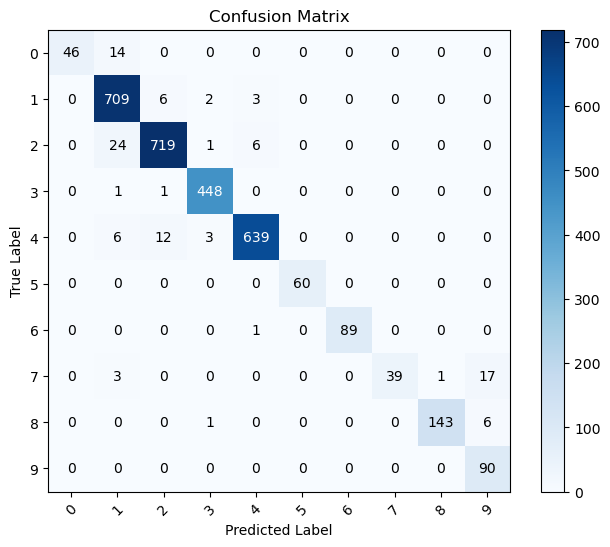

In [60]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y_true)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")

plt.show()

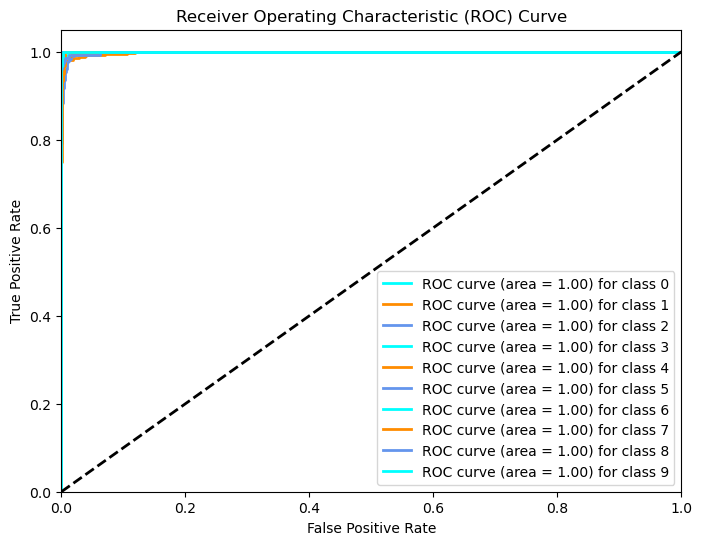

In [61]:
# Plot ROC curve
n_classes = len(np.unique(y_true))
y_true_bin = label_binarize(y_true, classes=range(n_classes))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5)))

# Flatten layer to transition from convolutional layers to fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
#Train the Model:
model.fit(X, y, epochs=10, validation_data=(XTest, yTest))

Epoch 1/10
303/303 [==============================] - 31s 101ms/step - loss: 1.5785 - accuracy: 0.3853 - val_loss: 0.9577 - val_accuracy: 0.6615
Epoch 2/10
303/303 [==============================] - 30s 100ms/step - loss: 0.6165 - accuracy: 0.7817 - val_loss: 0.3201 - val_accuracy: 0.8932
Epoch 3/10
303/303 [==============================] - 30s 101ms/step - loss: 0.3031 - accuracy: 0.8978 - val_loss: 0.1765 - val_accuracy: 0.9450
Epoch 4/10
303/303 [==============================] - 30s 100ms/step - loss: 0.1923 - accuracy: 0.9378 - val_loss: 0.1367 - val_accuracy: 0.9612
Epoch 5/10
303/303 [==============================] - 30s 100ms/step - loss: 0.1377 - accuracy: 0.9533 - val_loss: 0.1054 - val_accuracy: 0.9657
Epoch 6/10
303/303 [==============================] - 30s 99ms/step - loss: 0.1115 - accuracy: 0.9606 - val_loss: 0.0939 - val_accuracy: 0.9689
Epoch 7/10
303/303 [==============================] - 30s 98ms/step - loss: 0.0940 - accuracy: 0.9700 - val_loss: 0.0549 - val_accu

In [65]:
# Assuming your model is named 'model' and has already been trained

# Predictions on the test set
y_pred = model.predict(XTest)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# True labels for the test set
y_true = yTest

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')  # 'weighted' for multiclass classification
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred_classes)
roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovr')  # 'ovr' for multiclass classification
kappa = cohen_kappa_score(y_true, y_pred_classes)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC-AUC Score: {roc_auc}')
print(f'Cohen\'s Kappa: {kappa}')


97/97 [==============================] - 3s 26ms/step
Accuracy: 0.9809061488673139
Precision: 0.9812499933754714
Recall: 0.9809061488673139
F1 Score: 0.9809211493467611
Confusion Matrix:
[[ 58   2   0   0   0   0   0   0   0   0]
 [  0 703  13   2   2   0   0   0   0   0]
 [  0   1 740   8   0   0   1   0   0   0]
 [  0   1   6 443   0   0   0   0   0   0]
 [  0   1   3   4 652   0   0   0   0   0]
 [  0   0   0   0   0  60   0   0   0   0]
 [  0   0   0   0   0   0  90   0   0   0]
 [  0   0   0   0   0   0   0  58   2   0]
 [  0   0   0   0   0   0   2   2 138   8]
 [  0   0   0   0   0   0   1   0   0  89]]
ROC-AUC Score: 0.9996912860143675
Cohen's Kappa: 0.9765688860099632


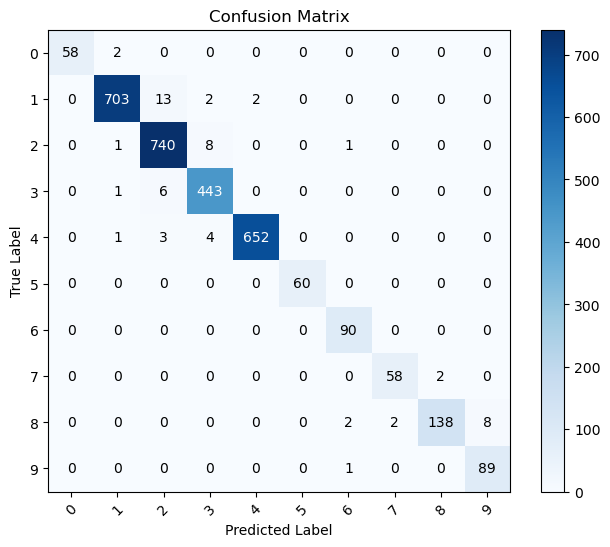

In [66]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y_true)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")

plt.show()

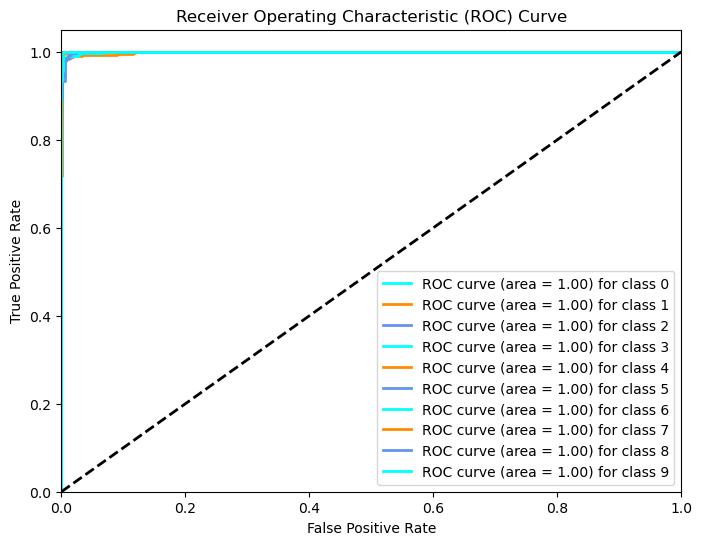

In [67]:
# Plot ROC curve
n_classes = len(np.unique(y_true))
y_true_bin = label_binarize(y_true, classes=range(n_classes))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()